# Customer Segmentation with Clustering:

**Project Objective:** To use unsupervised machine learning to identify distinct groups of customers within a mall's dataset. By segmenting customers based on multiple dimensions (income, age, spending habits), we can provide rich, actionable insights to the marketing team for highly targeted campaigns.


### Core Concepts We'll Cover:
1.  **Unsupervised Learning:** Understanding the difference between supervised and unsupervised learning.
2.  **Clustering Fundamentals & K-Means:** A deep dive into how the K-Means algorithm works.
3.  **The Elbow Method:** A critical technique for finding the optimal number of clusters (`k`).
4.  **Multi-dimensional EDA:** Exploring relationships between all features using 2D and 3D plots.
5.  **Multiple Segmentation Models:** Building and interpreting different clustering models based on different feature sets.
6.  **Hierarchical Clustering:** A brief introduction to an alternative clustering method.
7.  **Data-Driven Personas:** Translating cluster statistics into actionable business strategies.

### **Theoretical Concept: What is Unsupervised Learning?**

**Unsupervised learning** is different. Here, we work with datasets that **do not have a target variable**. The goal is not to predict a known outcome, but to discover hidden patterns, structures, and relationships within the data itself.

**Clustering** is the most common type of unsupervised learning. The objective is to group data points into clusters, such that points within the same cluster are very similar to each other, and points in different clusters are very dissimilar.


### Step 1: Setup - Importing Libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Set plot style
sns.set_style('whitegrid')

### **K-Means Clustering: Professional Overview**

K-Means is an unsupervised machine learning algorithm used to partition a dataset into *k* distinct, non-overlapping clusters based on feature similarity. The objective is to group data points such that points within the same cluster are more similar to each other than to those in other clusters, typically using Euclidean distance as the similarity metric.

#### **1. Selecting the number of clusters (*k*)**

Before running the algorithm, you specify the desired number of clusters. This value may be informed by domain knowledge, exploratory analysis techniques (e.g., the Elbow Method, Silhouette Score), or business constraints.

#### **2. Initialization of centroids**

The algorithm begins by initializing *k* centroids. These centroids can be chosen randomly or using more sophisticated initialization methods such as **k-means++**, which improves convergence and reduces the risk of poor clustering.

#### **3. Assignment step**

Each data point is assigned to the nearest centroid according to a chosen distance metric. This step partitions the dataset into *k* clusters, where each cluster contains the points closest to its centroid.

#### **4. Update step**

For each cluster, the centroid is recalculated as the mean of all data points assigned to that cluster. This updated centroid reflects the new “center of mass” of the cluster.

#### **5. Iteration until convergence**

Steps 3 and 4 are repeated iteratively. The algorithm converges when the centroids stabilize—that is, when subsequent iterations result in minimal or no changes to cluster assignments. Convergence guarantees that the algorithm has reached a local optimum of the objective function (minimizing within-cluster variance).

### **Outcome**

Once convergence is reached, the dataset is partitioned into *k* clusters, with each cluster representing a region of high similarity in the feature space.

K-Means is computationally efficient and widely used in applications such as customer segmentation, anomaly detection, image compression, and exploratory data analysis. However, it assumes spherical cluster shapes, is sensitive to initialization, and may struggle with clusters of varying density or non-linear separability.

In [2]:
# Load the dataset from the user-provided file
df = pd.read_csv('https://raw.githubusercontent.com/kush-agra-soni/5_customer_segmentaion_unsupervised_modelling/refs/heads/main/Mall_Customers.csv')
print(f"Data shape: {df.shape}")
df.head()

Data shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Step 2: In-Depth Exploratory Data Analysis (EDA)


In [3]:
# Basic info and statistics
df.info()

# Drop the CustomerID as it's just an identifier and not useful for clustering
df.drop('CustomerID', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000


#### 2.1 Univariate Analysis (Feature Distributions)

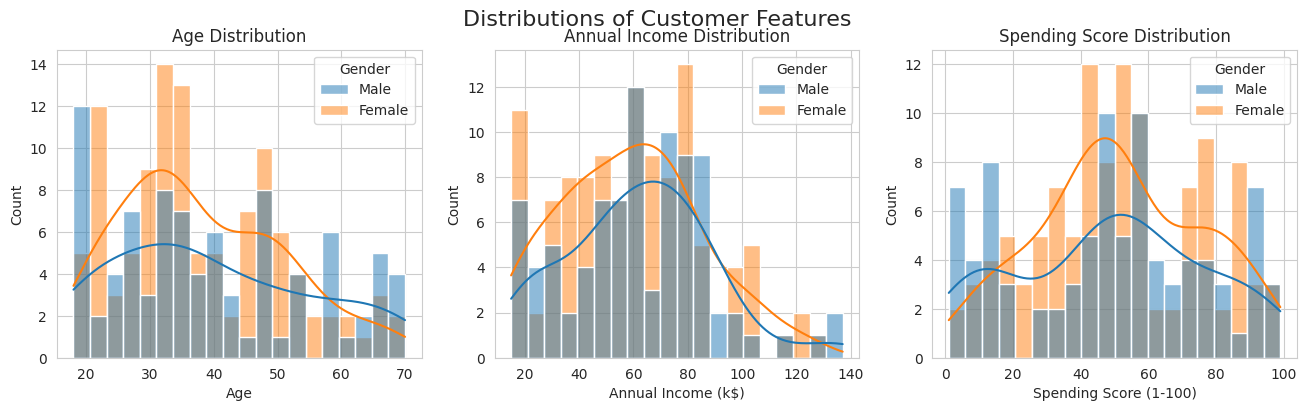

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Distributions of Customer Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=20, hue='Gender').set_title('Age Distribution')
sns.histplot(ax=axes[1], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title('Annual Income Distribution')
sns.histplot(ax=axes[2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution')

plt.show()

#### 2.2 Bivariate Analysis (Looking for Relationships)

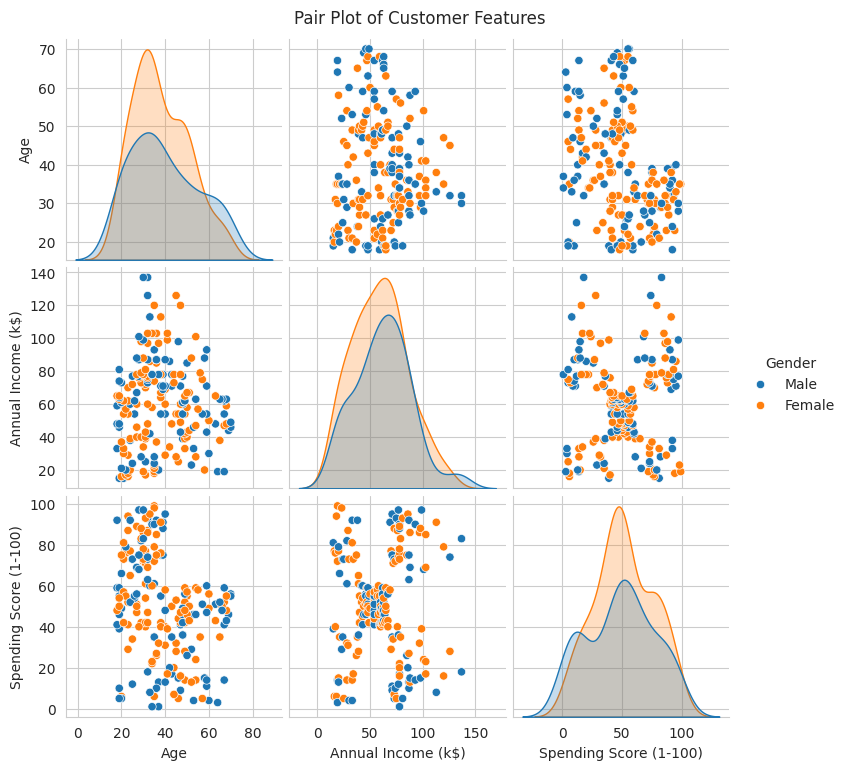

In [6]:
# Using pairplot to visualize relationships between all numerical variables
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

**CRITICAL INSIGHT from Pair Plot:**
- The **`Annual Income` vs. `Spending Score`** plot is the most revealing. It clearly shows distinct, blob-like groups, making it the perfect candidate for clustering.
- The **`Age` vs. `Spending Score`** plot shows some patterns but they are less defined. We see a concentration of high-spending customers in the younger age brackets.
- `Gender` does not appear to be a strong separating factor in any of these plots, as the distributions for males and females largely overlap.

#### 2.3 3D Visualization
Let's visualize the three most important features together in an interactive 3D plot to see if the clusters hold up.

In [7]:
fig = px.scatter_3d(df,
                    x='Annual Income (k$)',
                    y='Spending Score (1-100)',
                    z='Age',
                    color='Gender',
                    title='3D View of Customer Data')
fig.show()

### Step 3: Segmentation Model 1 - Income & Spending Score

## **Theoretical Concept: The Elbow Method**

How do we choose the best number of clusters (`k`) for our K-Means model? The **Elbow Method** is a common technique.

It works by calculating the **Within-Cluster Sum of Squares (WCSS)** for different values of `k` (typically from 1 to 10). WCSS is the sum of the squared distances between each point and the centroid of the cluster it belongs to. A lower WCSS means the points are closer to their cluster centroids, indicating tighter clusters.

We then plot WCSS against the number of clusters (`k`). As `k` increases, WCSS will always decrease (because each point gets closer to its assigned centroid). However, at some point, adding more clusters doesn't significantly reduce the WCSS. This point, where the rate of decrease sharply changes, looks like an "elbow" in the plot.

The **optimal number of clusters (`k`)** is typically chosen at this elbow point. It represents a good balance between having too few clusters (high WCSS) and too many clusters (overfitting and diminishing returns).

Here are the most common init options available:

* 'k-means++' (Default): This is the recommended method. It smarty initializes the centroids to be spread out from each other. This significantly improves the chances of finding a globally optimal solution and reduces the risk of converging to a suboptimal local minimum.
* 'random': This method chooses n_clusters observations (data points) randomly from the dataset and uses them as the initial centroids. While simple, it can sometimes lead to poor clustering results if the random initial centroids are not well-separated.
* A NumPy array: You can also provide a NumPy array with a shape of (n_clusters, n_features) that explicitly specifies the initial coordinates of the centroids. This is useful if you have prior knowledge about where the clusters should be located or if you want to replicate a specific initialization.

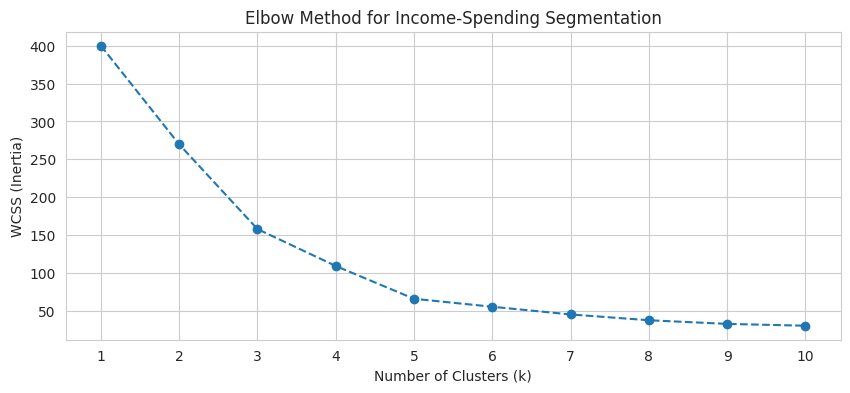

In [8]:
# 1. Select and scale the features
X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

# 2. Implement the Elbow Method
wcss1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1_scaled)
    wcss1.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

Imagine you've grouped your friends into different clubs (these are your clusters). WCSS helps you figure out how "together" or "spread out" the members are within each club.

Cluster: This is one of the groups you've formed.
Centroid: This is the "center point" of a cluster. Think of it as the average location of all the members in that club.
WCSS: For each cluster, you calculate the distance from every member in that cluster to the cluster's centroid. Then you square all these distances and add them up. You do this for all the clusters and add up the totals.
A low WCSS means that the points within each cluster are very close to their centroid. This suggests that the clusters are tight and well-defined.

A high WCSS means that the points within each cluster are more spread out from their centroid, indicating less distinct or looser clusters.

How WCSS relates to K-Means:

In K-Means, the algorithm's goal is to minimize the WCSS. It tries to find the best locations for the centroids and the best groupings of points so that the total WCSS is as small as possible.

The Elbow Method, which you saw in the notebook, uses WCSS to help choose the optimal number of clusters (k) for K-Means. You calculate the WCSS for different values of k and look for the "elbow" where the decrease in WCSS starts to slow down. This point suggests that adding more clusters doesn't significantly improve the "tightness" of the clusters.

**Observation:** The "elbow" of the curve is clearly at **k=5**. The WCSS decreases sharply until k=5, and then the rate of decrease flattens out. This confirms our visual intuition from the scatter plot!

In [9]:
# Build and fit the final model
kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Income_Cluster'] = kmeans1.fit_predict(X1_scaled)

#### 3.1 Visualizing and Interpreting the Income-Based Segments

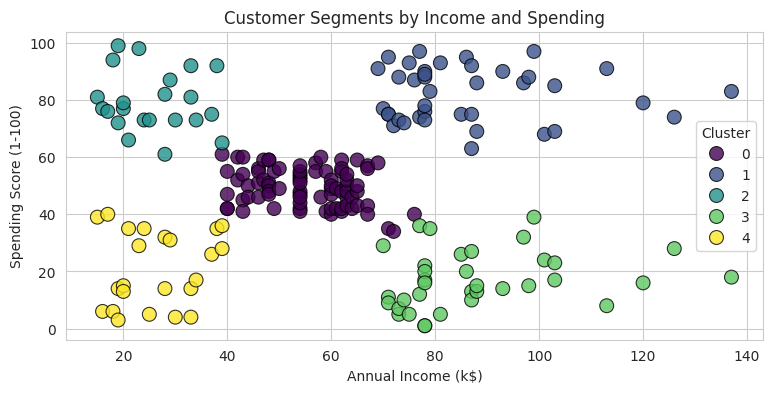

In [10]:
plt.figure(figsize=(9, 4))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Income_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [11]:
# Quantitative Persona Analysis
cluster_profiles1 = df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size'] = df['Income_Cluster'].value_counts()
print("--- Income-Based Cluster Profiles ---")
cluster_profiles1

--- Income-Based Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Size
Income_Cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


#### 3.2 Income-Based Personas and Strategy
Using the quantitative profiles, we can define our segments:
- **Cluster 0 (Careful High-Earners):** High income (~88k) but low spending (~17). Cautious, value-driven buyers.
- **Cluster 1 (Standard):** Average income (~55k) and spending (~50). This is the largest, core customer group.
- **Cluster 2 (Budget Shoppers):** Low income (~26k) and low spending (~21). Highly price-sensitive.
- **Cluster 3 (Target - High Value):** High income (~87k) and high spending (~82). The mall's prime target.
- **Cluster 4 (Enthusiasts):** Low income (~26k) but high spending (~79). Likely young, trend-focused shoppers.

### Step 4: Segmentation Model 2 - Age & Spending Score
Let's create a different segmentation model to see if we can find age-related customer groups.

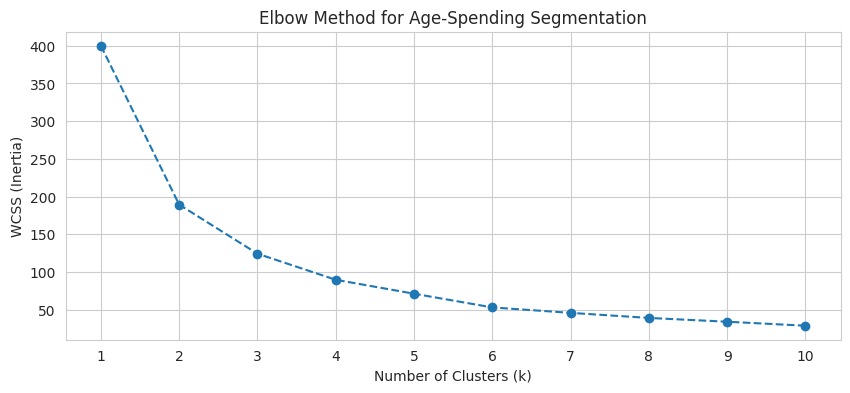

In [12]:
# 1. Select and scale the features
X2 = df[['Age', 'Spending Score (1-100)']]
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# 2. Implement the Elbow Method
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss2.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

**Observation:** The elbow is less sharp here, but **k=4** appears to be a reasonable choice.

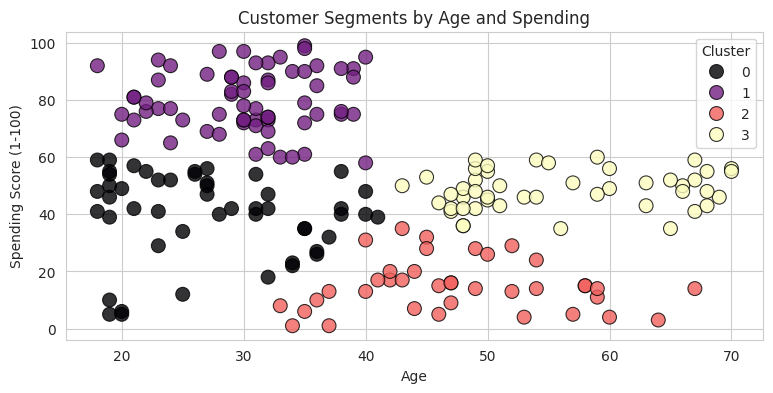

In [13]:
# Build and fit the final model for age segmentation
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)

# Visualize the new clusters
plt.figure(figsize=(9, 4))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

#### 4.1 Interpreting the Age-Based Segments
This model gives us a different perspective:
- **Young High-Spenders:** A clear group of customers under 40 with high spending scores.
- **Young Low-Spenders:** Customers under 40 with low-to-moderate spending.
- **Older Average-Spenders:** Customers over 40 with moderate spending scores.
- **Older Low-Spenders:** A small group of older customers with very low spending scores.

### Step 5: An Alternative Method - Hierarchical Clustering
To add more depth, let's briefly look at another clustering technique.

#### **Theoretical Concept: Hierarchical Clustering & Dendrograms**
Unlike K-Means, Hierarchical Clustering doesn't require us to specify the number of clusters beforehand. It builds a tree-like hierarchy of clusters.

We can visualize this hierarchy with a **dendrogram**. The dendrogram shows how clusters are merged (or split). To find the optimal number of clusters, we look for the tallest vertical line that doesn't cross any horizontal lines and draw a horizontal line through it. The number of vertical lines our new line crosses is the optimal number of clusters.


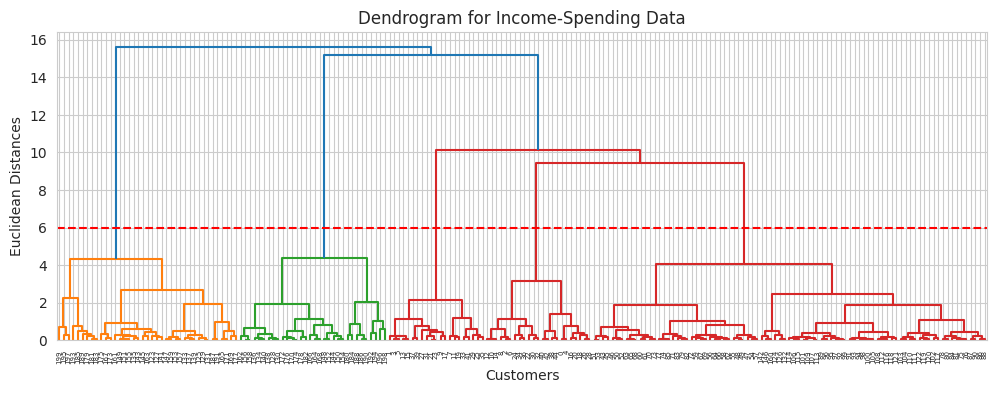

In [14]:
plt.figure(figsize=(12, 4))
dendrogram = sch.dendrogram(sch.linkage(X1_scaled, method='ward'))
plt.title('Dendrogram for Income-Spending Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=6, color='r', linestyle='--') # Example cut-off line
plt.show()

**Insight:** The dendrogram also confirms that **5 clusters** is the optimal number for the income-spending data. If we draw a horizontal line at a height of 6 (as shown by the red dashed line), it crosses five vertical lines.

### Step 6: Segmentation Model 3 - Gender & Spending Score

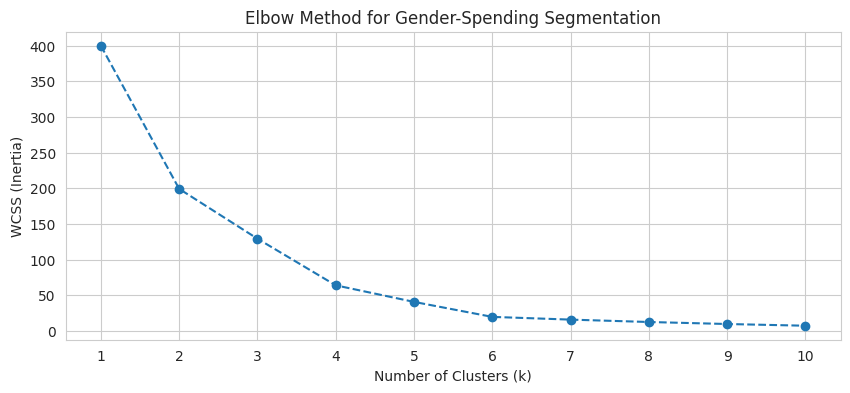

In [15]:
# 1. Select and scale the features
le = LabelEncoder()
df['Gender_Num'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

X3 = df[['Gender_Num', 'Spending Score (1-100)']]

# 2. Scale features
scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

# 3. Elbow Method
wcss3 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X3_scaled)
    wcss3.append(kmeans.inertia_)

# 4. Plot the Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(range(1, 11), wcss3, marker='o', linestyle='--')
plt.title('Elbow Method for Gender-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

**Observation:** The elbow is less sharp here, but **k=4** appears to be a reasonable choice.

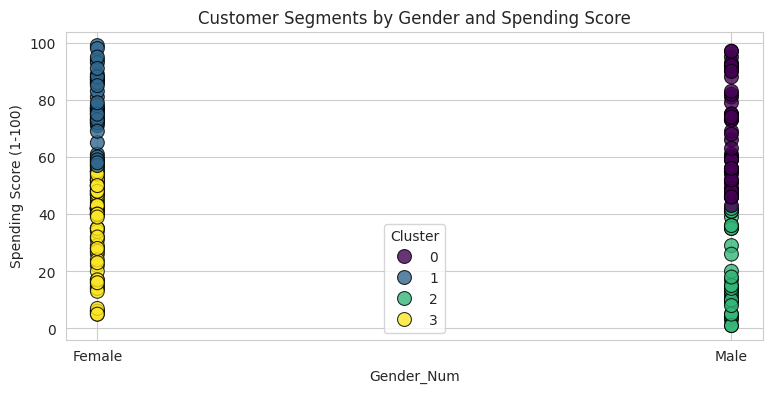

In [16]:
# Build and fit the final model for age segmentation
kmeans3 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Gender_Cluster'] = kmeans3.fit_predict(X3_scaled)

# Visualize the new clusters
plt.figure(figsize=(9, 4))
sns.scatterplot(data=df, x='Gender_Num', y='Spending Score (1-100)',
                hue='Gender_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Gender and Spending Score')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Cluster')
plt.show()

#### 6.1 Interpreting the Age-Based Segments

* **High-Spending Females**: A group of female customers with high spending scores (around 50-100).
* **Low-Spending Females**: A group of female customers with low spending scores (around 0-50).
* **High-Spending Males**: A group of male customers with high spending scores (around 50-100).
* **Low-Spending Males**: A group of male customers with low spending scores (around 0-50).

**Note**: The chart does not differentiate the clusters by gender in a way that aligns with the numerical cluster labels (0, 1, 2, 3), but it clearly shows that gender is a primary factor in the clustering.

### 7: Implementing New Feature

#### 7.1 Feature Engineering

In [17]:
# Feature Engineering: Income-to-Spending Ratio
df['Income_to_Spending_Ratio'] = df['Annual Income (k$)'] / df['Spending Score (1-100)']

# Check the new feature
print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Income_to_Spending_Ratio']].head())

   Annual Income (k$)  Spending Score (1-100)  Income_to_Spending_Ratio
0                  15                      39                  0.384615
1                  15                      81                  0.185185
2                  16                       6                  2.666667
3                  16                      77                  0.207792
4                  17                      40                  0.425000


#### 7.2Elbow Method (Age + Income-to-Spending Ratio)

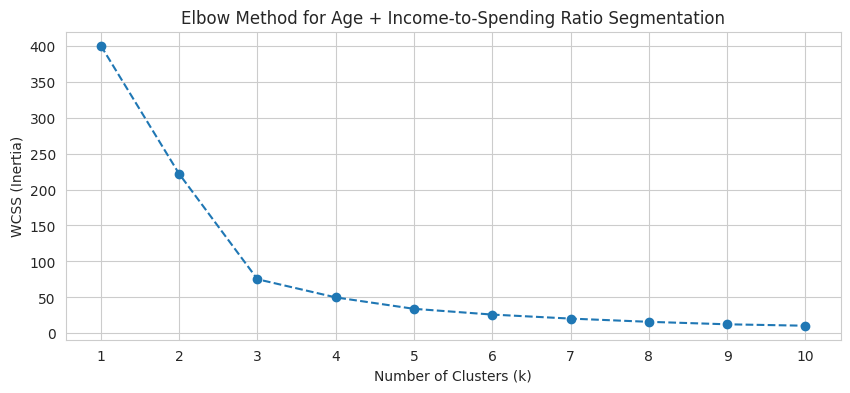

In [18]:
# 1. Select and scale features
X4 = df[['Age', 'Income_to_Spending_Ratio']]
scaler4 = StandardScaler()
X4_scaled = scaler4.fit_transform(X4)

# 2. Elbow Method
wcss4 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X4_scaled)
    wcss4.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(range(1, 11), wcss4, marker='o', linestyle='--')
plt.title('Elbow Method for Age + Income-to-Spending Ratio Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

####7.3 Final Model + Visualization

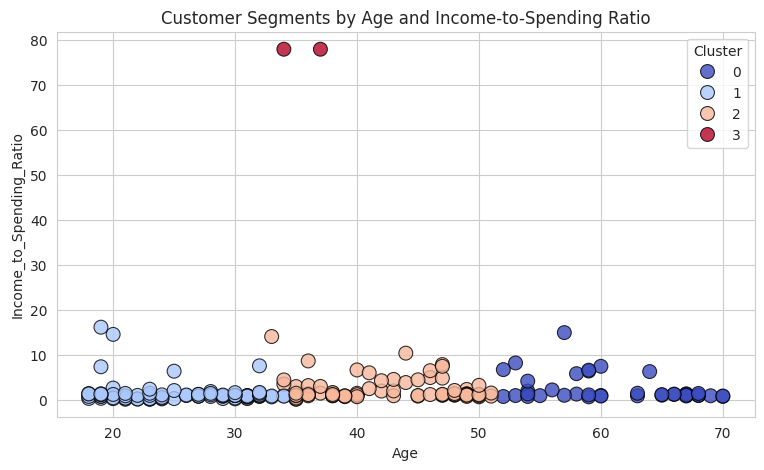

In [22]:
# Build and fit the final model (choose k based on elbow plot, e.g., k=4)
kmeans4 = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df['Income_Spending_Cluster'] = kmeans4.fit_predict(X4_scaled)

# Visualize the new clusters
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='Age', y='Income_to_Spending_Ratio',
                hue='Income_Spending_Cluster', palette='coolwarm', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Income-to-Spending Ratio')
plt.legend(title='Cluster')
plt.show()

### Insights from this Plot

* **Cluster 3 (Red, high ratio outliers)**

  * Very high income-to-spending ratio.
  * Likely *wealthy but very conservative* customers (high income, low spend).
  * Niche group but valuable for luxury upselling if activated.

* **Cluster 2 (Orange, mid ratios, wide age range)**

  * Moderate earners with balanced spending.
  * Largest cluster → represents the *core customer base*.
  * Marketing should focus on loyalty/retention.

* **Cluster 1 (Light Blue, young with slightly higher ratios)**

  * Younger age (<30) with moderate income but cautious spending.
  * Potential future high-value customers.
  * Target with *entry-level offers* to build long-term loyalty.

* **Cluster 0 (Dark Blue, low ratio, mixed age)**

  * Low ratio → spend more compared to income.
  * Includes both younger and older age groups.
  * *Big spenders relative to earnings* → prime for targeted campaigns & upselling.

**Key Takeaway:**
This ratio feature exposes *hidden spender groups* — some customers spend aggressively despite moderate income, while others earn a lot but barely spend. These insights are highly actionable for differentiated marketing strategies.

### Step 8: Conclusion

In this extended project, we successfully applied unsupervised machine learning to perform customer segmentation.

**Key Steps Undertaken:**
1.  **Performed an in-depth EDA:** Used 2D and 3D plots to explore customer data from multiple angles.
2.  **Built two distinct segmentation models:** Created an income-based model and an age-based model, showing that segmentation is not a one-size-fits-all process.
3.  **Used the Elbow Method** to programmatically determine the optimal number of clusters for each scenario.
4.  **Introduced Hierarchical Clustering** as an alternative method and used its dendrogram to validate our choice of `k`.
5.  **Created quantitative, data-driven personas** for each segment, providing the marketing team with precise, actionable insights for targeted campaigns.

This project highlights how different clustering approaches can uncover different facets of customer behavior, providing a richer, more nuanced understanding than a single model alone.